Best route: [0, 2, 3, 1]
Shortest distance: 234


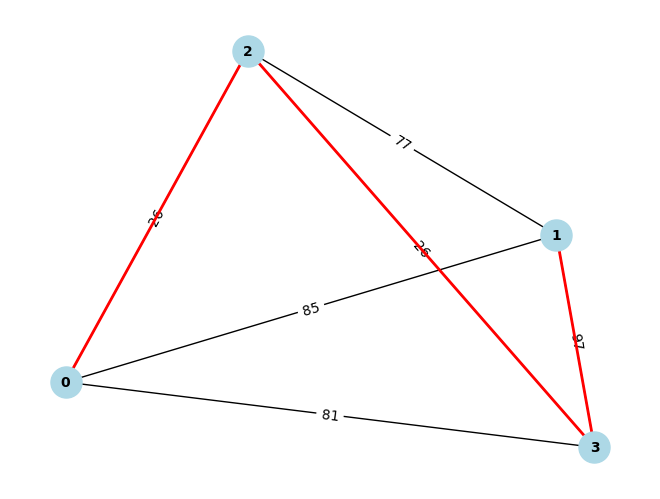

In [41]:
import networkx as nx
import matplotlib.pyplot as plt
from GA import genetic_algorithm

def main():
    distances = [
        [0, 85, 26, 81],
        [85, 0, 77, 97],
        [26, 77, 0, 26],
        [81, 97, 26, 0]
    ]
    n_cities = len(distances)
    solution = genetic_algorithm(n_cities, distances, population_size=100, generations=100, mutation_rate=0.1)
    
    # Print the route and distance
    print(f"Best route: {solution['route']}")
    print(f"Shortest distance: {solution['distance']}")
    
    # Create a graph
    G = nx.Graph()
    for i in range(n_cities):
        G.add_node(i)
        for j in range(i + 1, n_cities):
            G.add_edge(i, j, weight=distances[i][j])

    # Draw the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    # Highlight the best route
    route_edges = [(solution['route'][i], solution['route'][i + 1]) for i in range(len(solution['route']) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=route_edges, edge_color='r', width=2)

    plt.show()
if __name__ == "__main__":
    main()

In [88]:
from simpleai.search import SearchProblem, astar

class TSPProblem(SearchProblem):
    def __init__(self, distances):
        self.distances = distances
        self.n_cities = len(distances)
        super(TSPProblem, self).__init__(initial_state=(0,))

    def actions(self, state):
        if len(state) == self.n_cities:
            return []
        return [city for city in range(self.n_cities) if city not in state]

    def result(self, state, action):
        return state + (action,)

    def is_goal(self, state):
        return len(state) == self.n_cities

    def cost(self, state1, action, state2):
        return self.distances[state1[-1]][action]

    def heuristic(self, state):
        return 0

distances = [
    [0, 85, 26, 81],
    [85, 0, 77, 97],
    [26, 77, 0, 26],
    [81, 97, 26, 0]
]

problem = TSPProblem(distances)
result = astar(problem)

# Print the route and distance
route = result.state + (0,)
distance = sum(distances[route[i]][route[i + 1]] for i in range(len(route) - 1))
print(f"Best route: {route[:-1]}")
print(f"Shortest distance: {distance}")


Best route: (0, 2, 3, 1)
Shortest distance: 234
